<a href="https://colab.research.google.com/github/saghar-trade/TEXT-MINING/blob/main/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_twt=pd.read_csv('train_E6oV3lV.csv')
df_twt.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df_twt.label.unique()

array([0, 1])

In [4]:
df_twt.label.value_counts()

,count
label,
0,29720
1,2242


In [5]:
import matplotlib.pyplot as plt

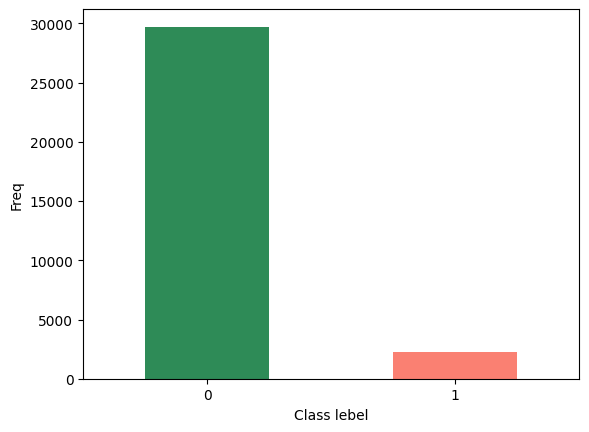

In [6]:
y_value_count=df_twt.label.value_counts()
y_value_count.plot(kind='bar', color=['seagreen', 'salmon'])
plt.xlabel('Class lebel')
plt.ylabel('Freq')
plt.xticks(rotation=0);



In [59]:
!pip install contractions

In [7]:
import contractions

df_twt['cont_tweet'] = df_twt['tweet'].apply(lambda x: contractions.fix(x))

In [8]:

df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace('@user','')
df_twt

,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use because...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [10]:

df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace(r'[^a-zA-Z#]', ' ', regex=True)
df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace('#','')
df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace('http\S+|www.\S+', '', regex=True)
df_twt


<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-2070657424.py:3: SyntaxWarning: invalid escape sequence '\S'
  df_twt['cont_tweet']=df_twt['cont_tweet'].str.replace('http\S+|www.\S+', '', regex=True)


,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use because ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love you take with you all the time ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso con...


In [11]:
#get most common word in training darraset
from collections import Counter
all_words=[]
for line in list(df_twt['cont_tweet']):
    words=line.split()
    for word in words:
        all_words.append(word.lower())
counter_all_words=Counter(all_words).most_common(10)


In [12]:
#tokenization

df_twt['cont_tweet']=df_twt['cont_tweet'].astype(str).apply(lambda x: x.split())
df_twt.head()


,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, cannot, use, be..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, you, take, with, you, all, th..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [14]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
df_twt['cont_tweet']=df_twt['cont_tweet'].apply(lambda x: [stemmer.stem(word) for word in x])
df_twt.head()

,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, cannot, use, bec..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, you, take, with, you, all, th..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
df_twt['cont_tweet']=df_twt['cont_tweet'].apply(lambda x: [word for word in x if word not in stop_words])

In [18]:
import string

df_twt['cont_tweet'] = df_twt['cont_tweet'].apply(
    lambda tokens: [w.strip(string.punctuation) for w in tokens if w.strip(string.punctuation)]
)

df_twt.head()

,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunct, selfish, drag, hi, kid, hi,..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, lyft, credit, cannot, use, becaus, off..."
2,3,0,bihday your majesty,"[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, take, time]"
4,5,0,factsguide: society now #motivation,"[factsguid, societi, motiv]"


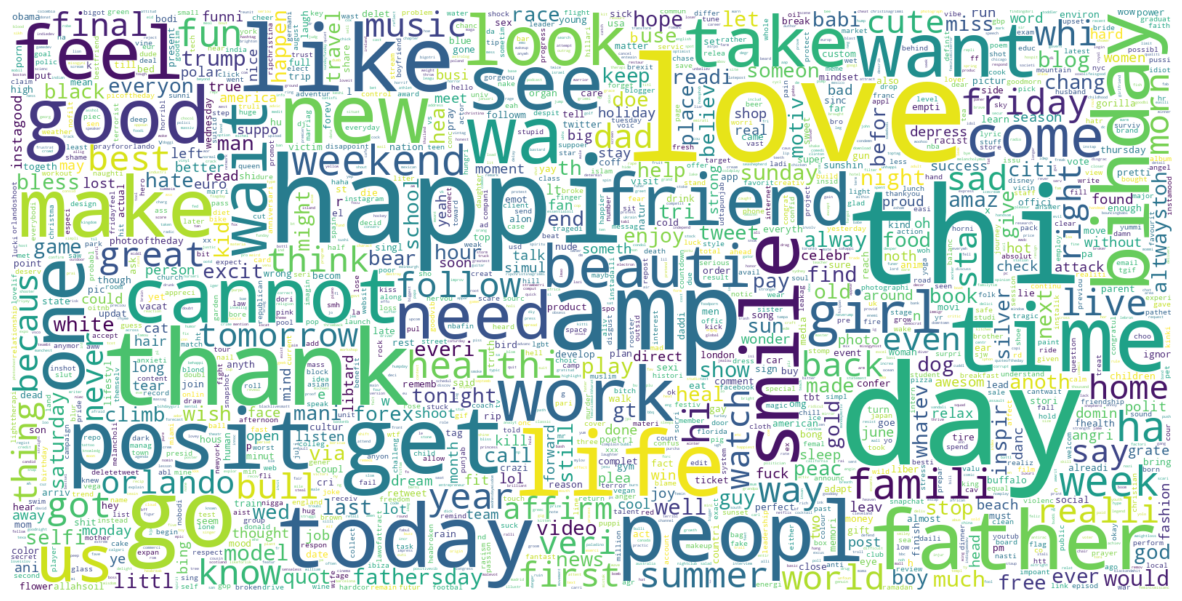

In [21]:
from wordcloud import WordCloud
words=[]
for line in df_twt['cont_tweet']:
  words.extend(line)
#create a word frequency dictionary
wordferq=Counter(words)
#draw a word cloud with word frequencies
wordcloud=WordCloud(background_color='white',max_words=2000,stopwords=stopwords,width=1600, height=800, max_font_size=200).generate_from_frequencies(wordferq)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
def string(text):
  to_return=''
  for word in text:
    to_return=to_return+' '+word
  return to_return
df_twt['cont_tweet']=df_twt['cont_tweet'].apply(lambda x: string(x))
df_twt.head()

,id,label,tweet,cont_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cannot use becaus offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love take time
4,5,0,factsguide: society now #motivation,factsguid societi motiv


In [26]:
positve=[r for r in df_twt['cont_tweet'][df_twt['label']==1]]
pos=''.join(positve)
negative=[r for r in df_twt['cont_tweet'][df_twt['label']==0]]
neg=''.join(negative)

' cnn call michigan middl school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin retweet agr lumpi say prove lumpi unbeliev st centuri would need someth like thi neverump xenophobia let us fight love peac white establish cannot blk folx run around love themselv promot great hey white peopl call peopl white race ident med altright use amp insecur lure men whitesupremaci interest linguist doe address race amp racism power raciolinguist bring whi mock obama black brexit peopl protest trump becaus republican becaus trump ha fuher amp ye call michelleobama gorilla becaus racist long thought black peopl bet smaller hand show barri probabl lie whi hi knick game suck hi golf point one finger million point right back jewishsupremacist might libtard libtard sjw liber polit take trash america vote hate vote vote vot hold open door woman becaus woman becaus nice thing even tri deni thi man ran governor ny state biggest african american popul 

In [29]:
wordcloud=WordCloud(background_color='white',max_words=2000,stopwords=stopwords
                    ,width=1600, height=800,
                    max_font_size=200).generate(pos)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: 'WordListCorpusReader' object is not iterable

In [30]:
wordcloud=WordCloud(background_color='black',max_words=2000,stopwords=stopwords
                    ,width=1600, height=800,
                    max_font_size=200).generate(neg)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: 'WordListCorpusReader' object is not iterable

In [31]:
df_twt.drop(['id','tweet'],axis=1,inplace=True)
df_twt.head()

,label,cont_tweet
0,0,father dysfunct selfish drag hi kid hi dysfun...
1,0,thank lyft credit cannot use becaus offer whe...
2,0,bihday majesti
3,0,model love take time
4,0,factsguid societi motiv


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_twt['cont_tweet'],df_twt['label'], test_size=0.2, random_state=42)
print('tarining set:',x_train.shape,y_train.shape)
print('testing set:',x_test.shape,y_test.shape)


tarining set: (25569,) (25569,)
testing set: (6393,) (6393,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer